### Assignment 1 - Data Exploration

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explore a dataset about used cars.

In [ ]:
1. Import the necessary packages.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# This import packages will import all the necessary libraries required to run the codes in this notebook.

In [ ]:
2. Read in the dataset, 'ToyotaCorolla.csv'.
The data set includes sale prices and vehicle characteristics of 1436 used Toyota Corollas. The variables are defined as follows:<br>
a.	Price: sale price in Euros<br>
b.	Age: age in months<br>
c.	KM: accumulated kilometers on odometer<br>
d.	Fuel_type: Fuel type (petrol, diesel, CNG)<br>
e.	HP: horsepower<br>
f.	MetColor: Metallic color (yes=1, no=0)<br>
g.	Automatic: Automatic gear shift (yes=1, no=0)<br>
h.	Doors: Number of doors<br>


In [29]:
auto = pd.read_csv('ToyotaCorolla.csv')
auto.head(10)
# This command reads the 'ToyotaCorolla.csv' dataset and fetch the 1st 10 rows from the dataset. 

,Price,Age,KM,Fuel_Type,HP,MetColor,Automatic,Doors
0,13500,23,46986,Diesel,90,1,0,3
1,13750,23,72937,Diesel,90,1,0,3
2,13950,24,41711,Diesel,90,1,0,3
3,14950,26,48000,Diesel,90,0,0,3
4,13750,30,38500,Diesel,90,0,0,3
5,12950,32,61000,Diesel,90,0,0,3
6,16900,27,94612,Diesel,90,1,0,3
7,18600,30,75889,Diesel,90,1,0,3
8,21500,27,19700,Petrol,192,0,0,3
9,12950,23,71138,Diesel,69,0,0,3


In [34]:
auto.columns
# This command shows all the columns available in the dataset presented in the output.

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'MetColor', 'Automatic',
       'Doors'],
      dtype='object')

3. Explore the variable 'Price' using statistics (central tendency and variability) and a graph. Describe your findings.

In [37]:
price_value_counts = auto['Price'].value_counts()
price_value_counts

Price
8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: count, Length: 236, dtype: int64

This code provides the summary of unique values of the distribution in the prices of the'ToyotaCorolla.csv'dataset in descending order.

In [38]:
price_statistics = auto['Price'].describe()
price_statistics

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

This calculate the statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for the 'Price' variable using the describe() method.

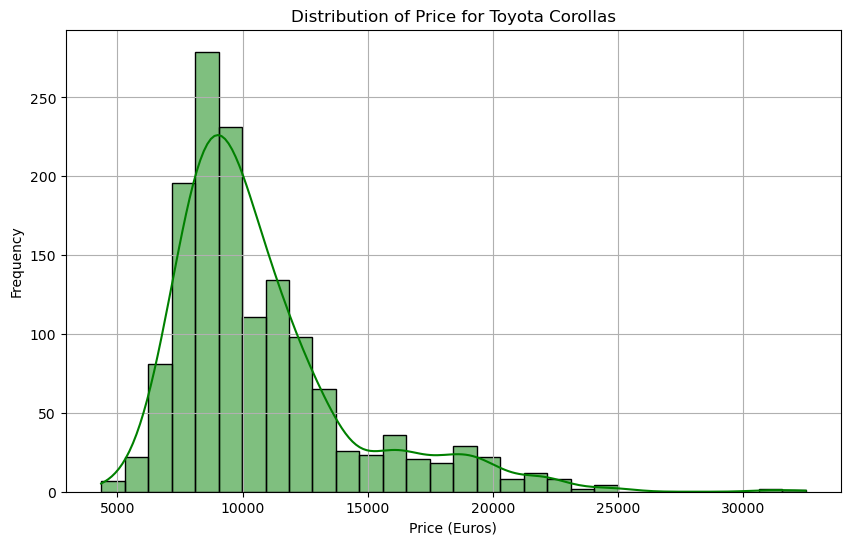

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['Price'], bins=30, kde=True, color = 'green')
plt.title('Distribution of Price for Toyota Corollas')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Bins: 30
#Interpretation: The data range is divided into 30 intervals.
#Visual Effect: The resulting histogram will have 30 bars.

This histogram provides the distribution of the prices for Toyota Corollas,the spread of the histogram indicates the variability in prices across the dataset.It's skewed to the right (positive skew), suggests that prices are concentrated towards the lower end. and the summary statistics provides the summary of the central tendency and variability in the prices of the'ToyotaCorolla.csv' dataset.There are a few outliers present in the dataset, that represents exceptional cases with unusually high or low prices compared to the rest of the dataset.

4. Explore the variable 'Fuel_type' using statistics and a graph. Describe your findings.

In [40]:
Fuel_type_count = auto['Fuel_Type'].value_counts()
Fuel_type_count
# This code provides the summary of the unique values of the 'Fuel_Type' in the dataset.

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [23]:
Fuel_Type_Statistics = auto['Fuel_Type'].describe()
Fuel_Type_Statistics

count       1436
unique         3
top       Petrol
freq        1264
Name: Fuel_Type, dtype: object

#Fuel_Type_Statistics contains the descriptive statistics for the 'Fuel_Type' column, including count, unique values, and the most frequent value.

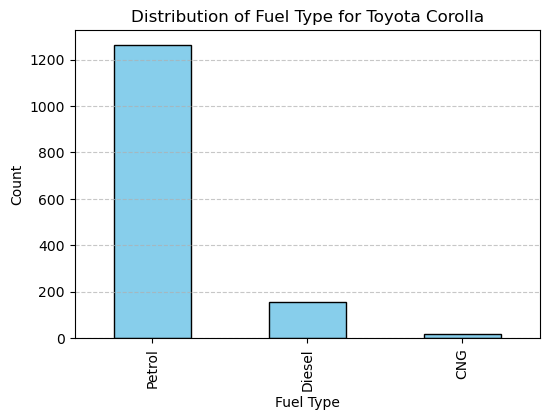

In [42]:
plt.figure(figsize=(6, 4))
Fuel_type_count.plot(kind = 'bar', color ='skyblue', edgecolor = 'black')
plt.title('Distribution of Fuel Type for Toyota Corolla')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha=0.7)
plt.show()


While the value counts summary gives the exact counts of each fuel type, This information helps us understand the distribution of fuel types among the used Toyota Corollas in the dataset.The bar plot provides a visual representation of the frequency of each fuel type. From the graph, it's evident that petrol is the most common fuel type, followed by diesel, while CNG is the least prevalent.This indicates that the majority of Toyota Corollas in the dataset are powered by petrol engines, with a smaller proportion using diesel and an even smaller proportion using CNG.

5. Explore the relationship between variable 'KM' and 'Price' using statistics and a graph. Describe your findings.

In [60]:
km_stats = auto['KM'].describe()
price_stats = auto['Price'].describe()
km_stats
price_stats
# This code explains the descriptive statistics of bith the 'KM' and the 'Price'.

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

In [61]:
correlation_KM_Price = auto['KM'].corr(auto['Price'])
correlation_KM_Price

-0.5699601645337193

This code describes the correlation co-efficient between 'KM' and 'Price'. We calculate the correlation and finds  that the correlation co-efficient calculated is close to -1 indicating a strong negative correlation, meaning that as 'KM' increases, 'Price' tends to decrease.

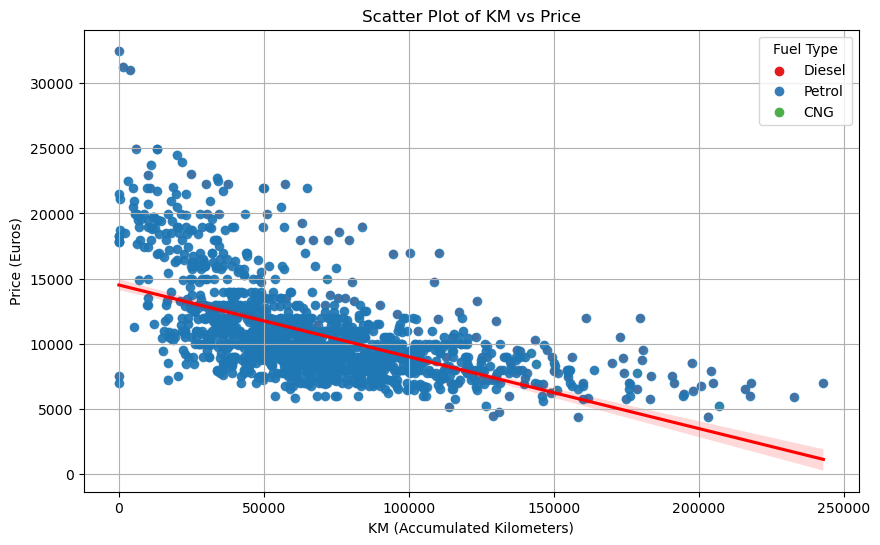

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM', y='Price', hue='Fuel_Type', data=auto, alpha=0.7, palette='Set1')
sns.regplot(x='KM',y='Price',data= auto,line_kws={'color': 'red'})
plt.title('Scatter Plot of KM vs Price')
plt.xlabel('KM (Accumulated Kilometers)')
plt.ylabel('Price (Euros)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

There is a negative relation between 'KM' and 'Price' and tends to have a downward trend observed from the points in the scatterplot. The spread of points in the scatter plot represents the variability in sale prices for cars with similar accumulated kilometers. We can observe how this variability differs across different fuel types. The scatter plot shows how the prices of Toyota Corollas change as they accumulate more kilometers. Each dot on the plot represents a car, and its position shows its price and the number of kilometers it has traveled. Generally, we see that as the kilometers increase, the prices tend to decrease. This means that cars with higher mileage often have lower prices. Additionally, the different colors of the dots represent the type of fuel the cars use (like petrol, diesel, or CNG).

6. Explore the relationship between variable 'Automatic' and 'Price' using a graph. Describe your findings.

In [62]:
automatic_value_counts = auto['Automatic'].value_counts()
price_value_counts = auto['Price'].value_counts()
automatic_value_counts
price_value_counts

Price
8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: count, Length: 236, dtype: int64

This code will count the occurrences of each unique value in the 'Automatic' variable and display the counts. It will provide insights into the distribution of automatic and non-automatic cars in the dataset, where 0 is non-automatic and 1 is automatic and also the unique values in the distribution of the prices.

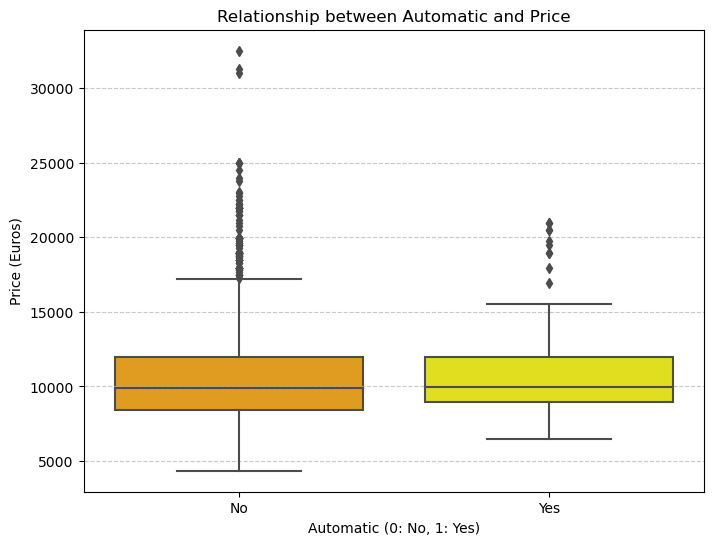

In [50]:
plt.figure(figsize=(8, 6))
custom_palette = ['orange', 'yellow']
sns.boxplot(x='Automatic', y='Price', data=auto, palette=custom_palette)
plt.title('Relationship between Automatic and Price')
plt.xlabel('Automatic (0: No, 1: Yes)')
plt.ylabel('Price (Euros)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The x-axis represents the 'Automatic' variable, where 0 indicates cars with manual gear shift and 1 indicates cars with automatic gear shift.The y-axis represents the 'Price' variable, showing the sale price of the cars in Euros.
Cars with automatic transmission are represented by the yellow boxes, and those with manual transmission are shown in orange. Firstly, automatic transmission vehicles tend to have higher median prices compared to manual transmission cars, as indicated by the position of the yellow median line above the orange one. Secondly, there is a wider interquartile range (IQR) for automatic transmission cars, suggesting greater variability in prices within this category. Additionally, both groups exhibit outliers, particularly noticeable in the automatic transmission category, indicating exceptional cases with significantly higher prices. 

7. Check the number of unique values of 'Doors'. How many of them? Think about the measurement level of “Doors”. What would you do with this variable?

In [51]:
unique_doors = auto['Doors'].nunique()

#Display the unique value of 'Doors'
doors_value = auto['Doors'].unique()

#Print the results
print("Number of unique value of 'Doors':", unique_doors)
print("Unique values of 'Doors':", doors_value)

Number of unique value of 'Doors': 4
Unique values of 'Doors': [3 5 4 2]


The number unique value indicate how many different categories or levels are present in the 'Doors' variable. The unique value themselves will tell what these categories are.
Regarding the measurement level of 'Doors':
The doors represent a categorical variable with a limited number of discrete level [3 5 4 2], it is likely a nominal variable.
